In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('bank.csv',delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [74]:

print(df.head())


   age  default  balance  housing  loan   contact  day month  duration  \
0   30        0     1787        0     0  cellular   19   oct        79   
1   33        0     4789        1     1  cellular   11   may       220   
2   35        0     1350        1     0  cellular   16   apr       185   
3   30        0     1476        1     1   unknown    3   jun       199   
4   59        0        0        1     0   unknown    5   may       226   

   campaign  ...  marital_married  marital_single  education_primary  \
0         1  ...                1               0                  1   
1         1  ...                1               0                  0   
2         1  ...                0               1                  0   
3         4  ...                1               0                  0   
4         1  ...                1               0                  0   

   education_secondary  education_tertiary  education_unknown  \
0                    0                   0               

In [51]:
# Check for missing values
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [52]:

df.shape

(4521, 17)

In [53]:

#Printng the Last 10 values to get the over view of the Dataset
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4511,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
4512,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [54]:

#Describing the Dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [55]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [56]:

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [57]:
df['loan'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [58]:

df['housing'].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [59]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [60]:
df['housing'] = df['housing'].map({'no':0,'yes':1})
df['housing']

0       0
1       1
2       1
3       1
4       1
       ..
4516    1
4517    1
4518    0
4519    0
4520    1
Name: housing, Length: 4521, dtype: int64

In [61]:
df['loan']= df['loan'].map({'yes':1,'no':0})
df['loan']


0       0
1       1
2       0
3       1
4       0
       ..
4516    0
4517    1
4518    0
4519    0
4520    1
Name: loan, Length: 4521, dtype: int64

In [62]:
df['y']=df['y'].map({'yes':1,'no':0})
df['y']

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [63]:
df['default']= df['default'].map({'yes':1,'no':0})
df['default']

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    1
4518    0
4519    0
4520    0
Name: default, Length: 4521, dtype: int64

In [64]:

# Convert categorical variables to dummies
df = pd.get_dummies(data=df, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,cellular,19,oct,79,1,...,1,0,1,0,0,0,0,0,0,1
1,33,0,4789,1,1,cellular,11,may,220,1,...,1,0,0,1,0,0,1,0,0,0
2,35,0,1350,1,0,cellular,16,apr,185,1,...,0,1,0,0,1,0,1,0,0,0
3,30,0,1476,1,1,unknown,3,jun,199,4,...,1,0,0,0,1,0,0,0,0,1
4,59,0,0,1,0,unknown,5,may,226,1,...,1,0,0,1,0,0,0,0,0,1


In [65]:

df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [66]:

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #2) [Used to create classifier]
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split #1) [used tp train & split]
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap 

In [67]:
x=[	'age', 'balance', 'housing', 'loan','poutcome_failure','poutcome_other','poutcome_success']
x=df[x]
y=df['y']
print(x)
print(y)

      age  balance  housing  loan  poutcome_failure  poutcome_other  \
0      30     1787        0     0                 0               0   
1      33     4789        1     1                 1               0   
2      35     1350        1     0                 1               0   
3      30     1476        1     1                 0               0   
4      59        0        1     0                 0               0   
...   ...      ...      ...   ...               ...             ...   
4516   33     -333        1     0                 0               0   
4517   57    -3313        1     1                 0               0   
4518   57      295        0     0                 0               0   
4519   28     1137        0     0                 0               1   
4520   44     1136        1     1                 0               1   

      poutcome_success  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [68]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2,random_state=42)


In [69]:

clf=DecisionTreeClassifier(max_depth=3)

In [70]:
clf.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [71]:
y_pred = clf.predict(x_test)


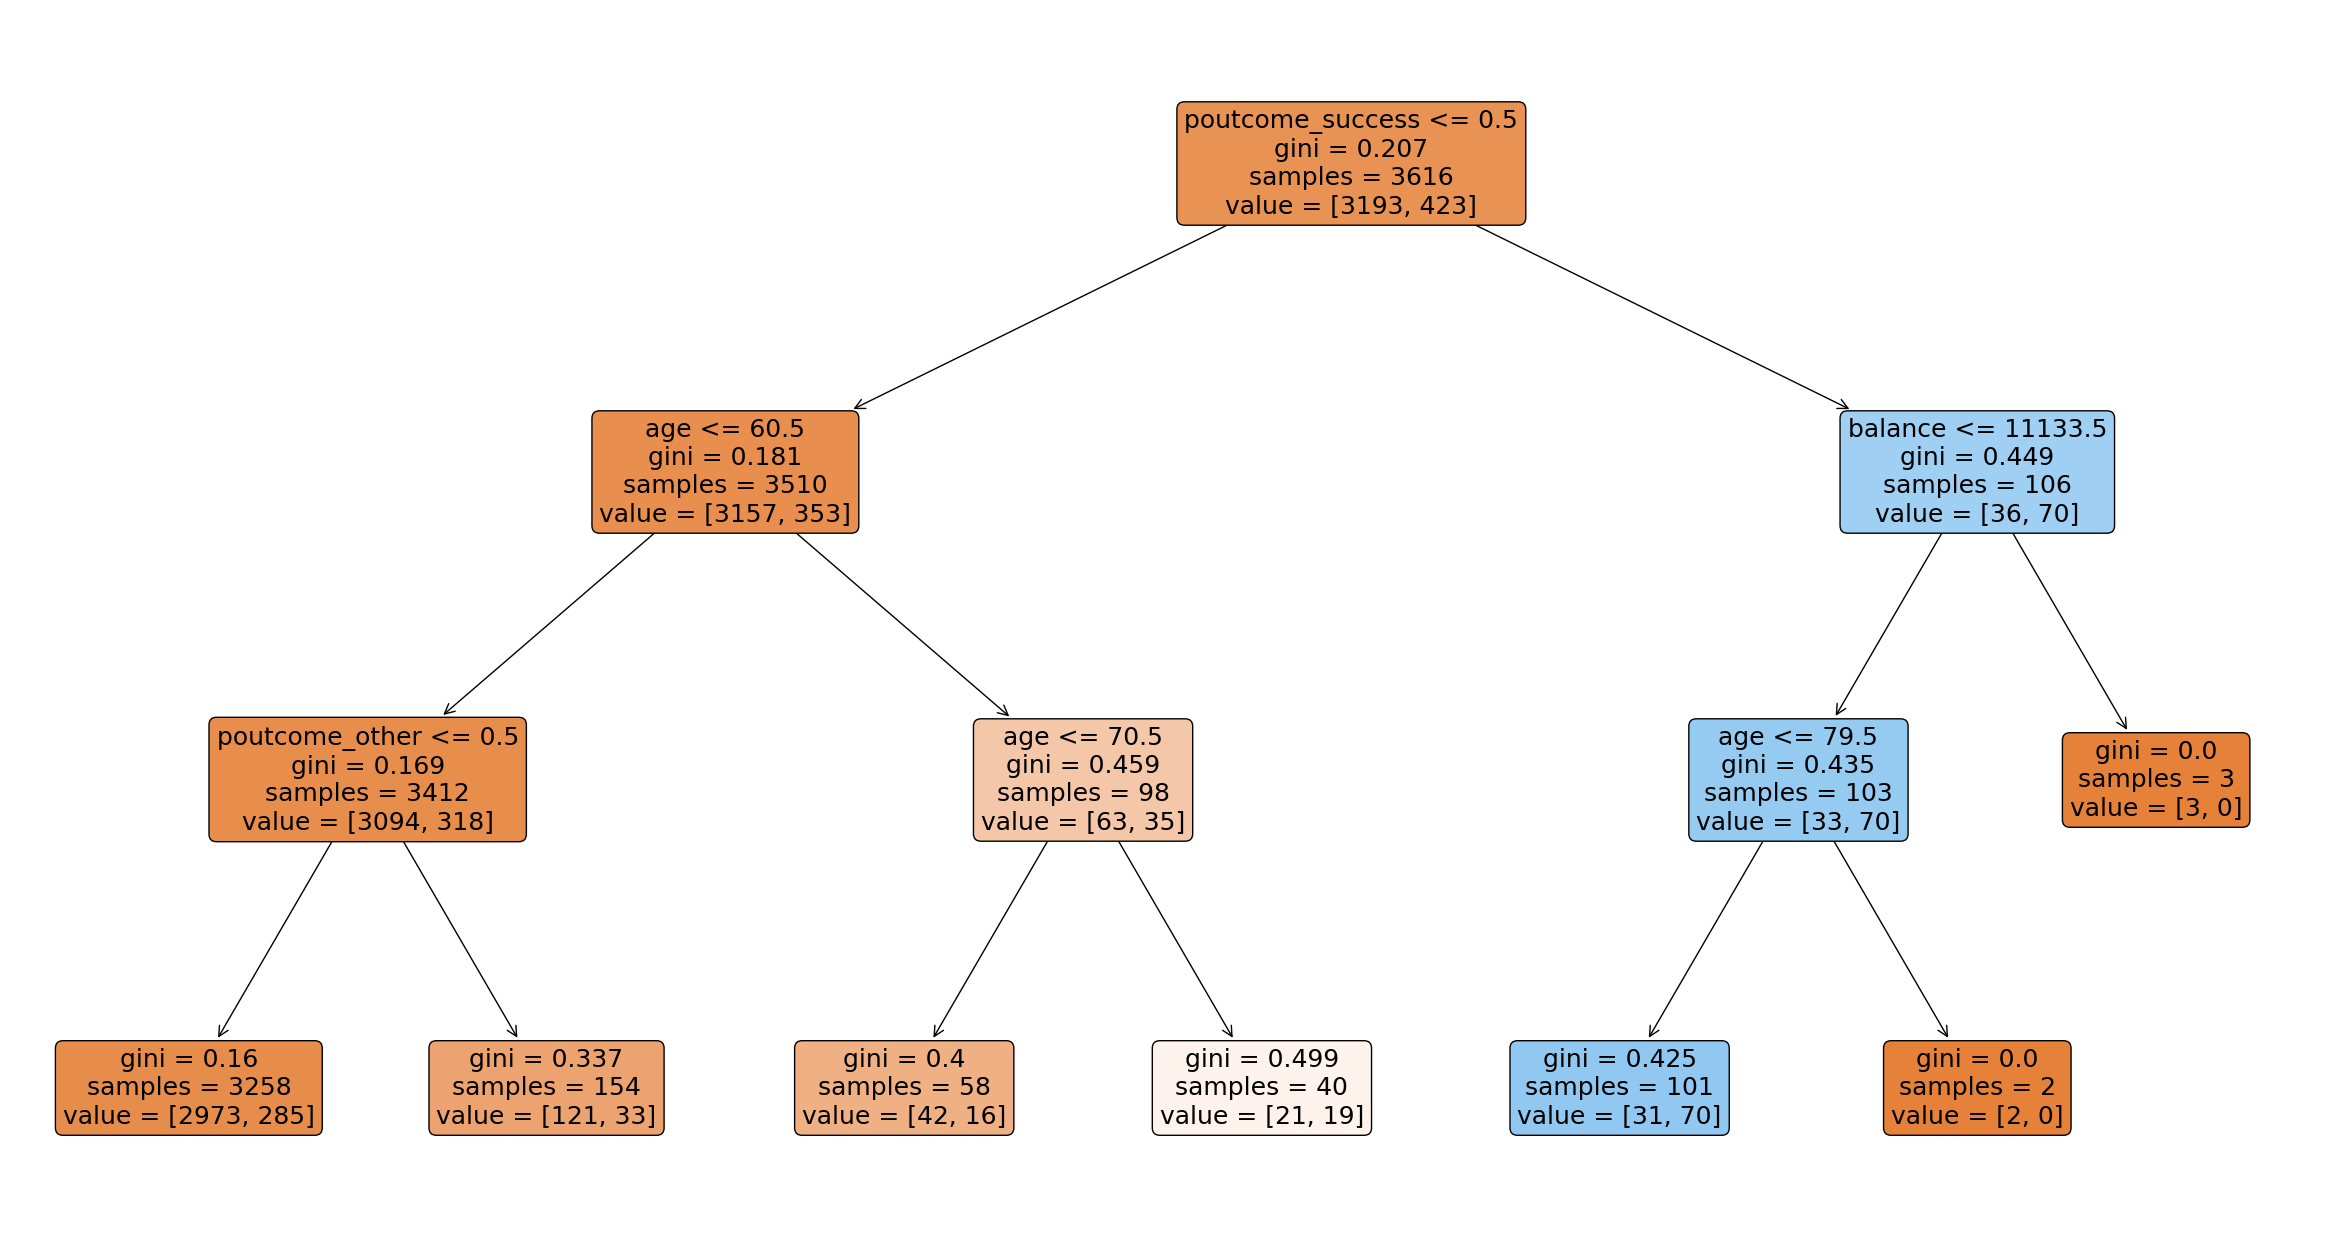

In [72]:
plt.figure(figsize=(30, 16))
plot_tree(clf, filled=True, feature_names=x.columns.tolist(), rounded=True, fontsize=18)
plt.show()
